* Importar galerias a usar

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

* llamamos a los csv

In [46]:
poblacion_df = pd.read_csv('../data/processed/Penetración-poblacion-limpio.csv')
hogares_df = pd.read_csv('../data/processed/penetracion-hogares-limpio.csv')
Tecnologia = pd.read_csv('../data/processed/accesos_por_tecnologia_limpio.csv')
total_df = pd.read_csv('../data/processed/Penetracion-totales.csv')

Realizo los graficos

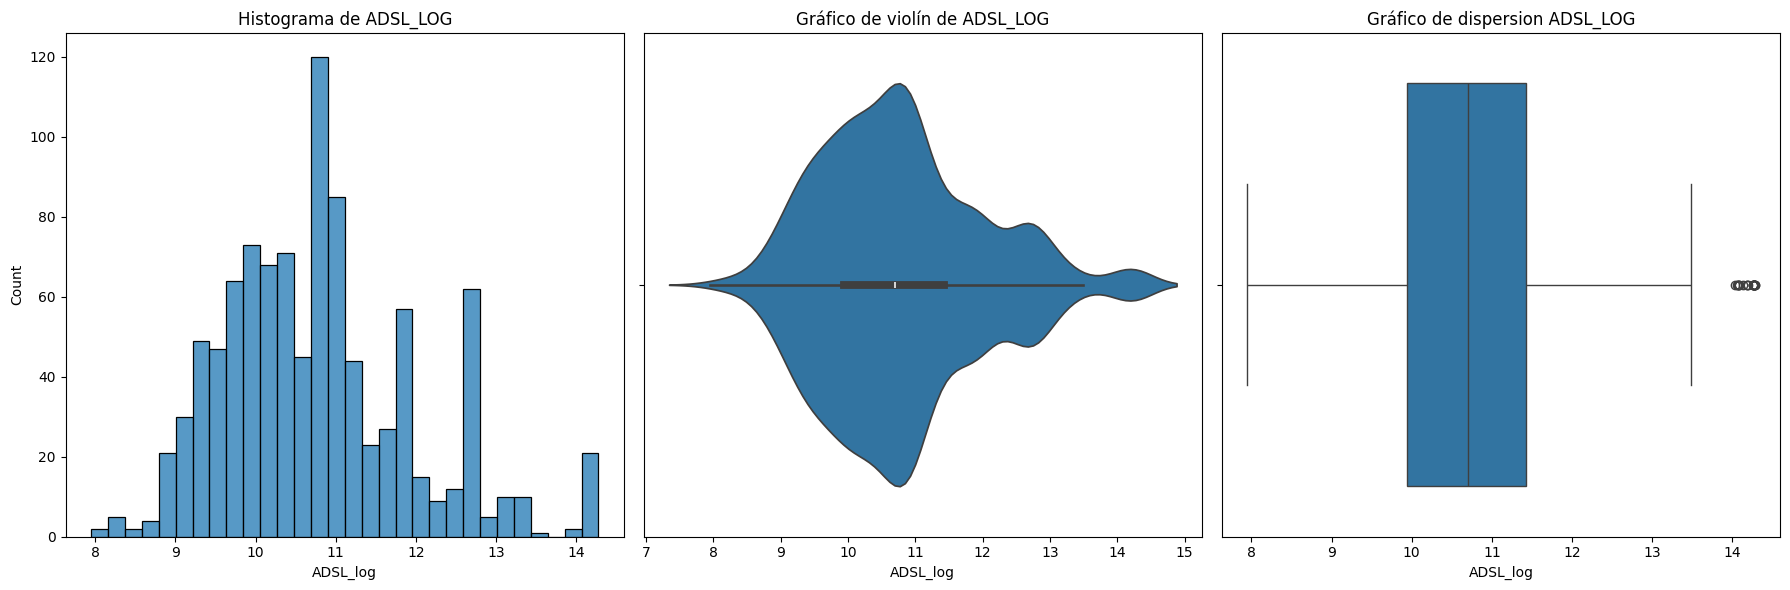

In [47]:
Tecnologia["ADSL_log"] = np.log(Tecnologia["ADSL"] + 1)  # +1 para evitar log(0)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histograma
sns.histplot(data = Tecnologia, x = "ADSL_log", bins = 30, ax = axes[0])
axes[0].set_title('Histograma de ADSL_LOG')

# Gráfico de violín
sns.violinplot(data = Tecnologia, x = "ADSL_log", ax = axes[1])
axes[1].set_title('Gráfico de violín de ADSL_LOG')

#Gráfico de dispersion
sns.boxplot(data = Tecnologia, x = "ADSL_log", ax = axes[2])
axes[2].set_title('Gráfico de dispersion ADSL_LOG')
# Mostrar los gráficos
plt.tight_layout()
plt.show()

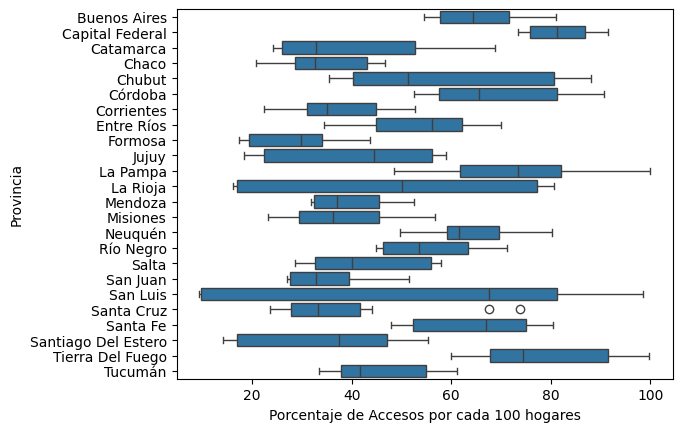

In [48]:
sns.boxplot(data = hogares_df, x = "Accesos por cada 100 hogares", y = "Provincia")
plt.xlabel("Porcentaje de Accesos por cada 100 hogares")
plt.show()

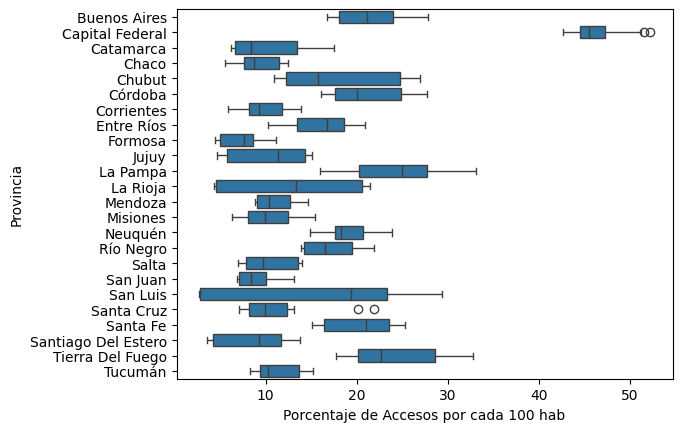

In [49]:
# Crear el diagrama de caja utilizando seaborn
sns.boxplot(data = poblacion_df, x = "Accesos por cada 100 hab", y = "Provincia")

# Etiqueta para el eje x
plt.xlabel("Porcentaje de Accesos por cada 100 hab")

# Mostrar el gráfico
plt.show()

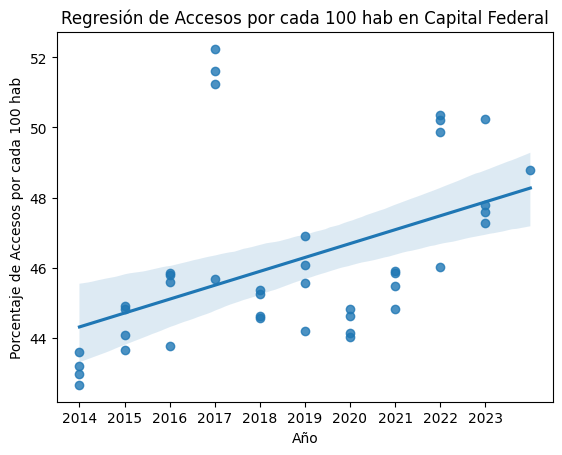

In [50]:
# Filtrar datos para la provincia de "Capital Federal"
capital_federal = poblacion_df[poblacion_df["Provincia"] == "Capital Federal"]

# Crear el gráfico de regresión utilizando seaborn
sns.regplot(x = "Año", y = "Accesos por cada 100 hab", data = capital_federal)

# Establecer el rango de los ticks en el eje x
plt.xticks(range(2014, 2024))

# Etiquetas para los ejes y título
plt.xlabel('Año')
plt.ylabel('Porcentaje de Accesos por cada 100 hab')
plt.title('Regresión de Accesos por cada 100 hab en Capital Federal')

# Mostrar el gráfico
plt.show()

* Separo para poder graficar trimestre por trimestre

In [51]:
df_total =  total_df[["Año","Trimestre","Accesos por cada 100 hab"]]

In [52]:
df_trim1 = df_total[df_total['Trimestre'] == 1]
df_trim2 = df_total[df_total['Trimestre'] == 2]
df_trim3 = df_total[df_total['Trimestre'] == 3]
df_trim4 = df_total[df_total['Trimestre'] == 4]

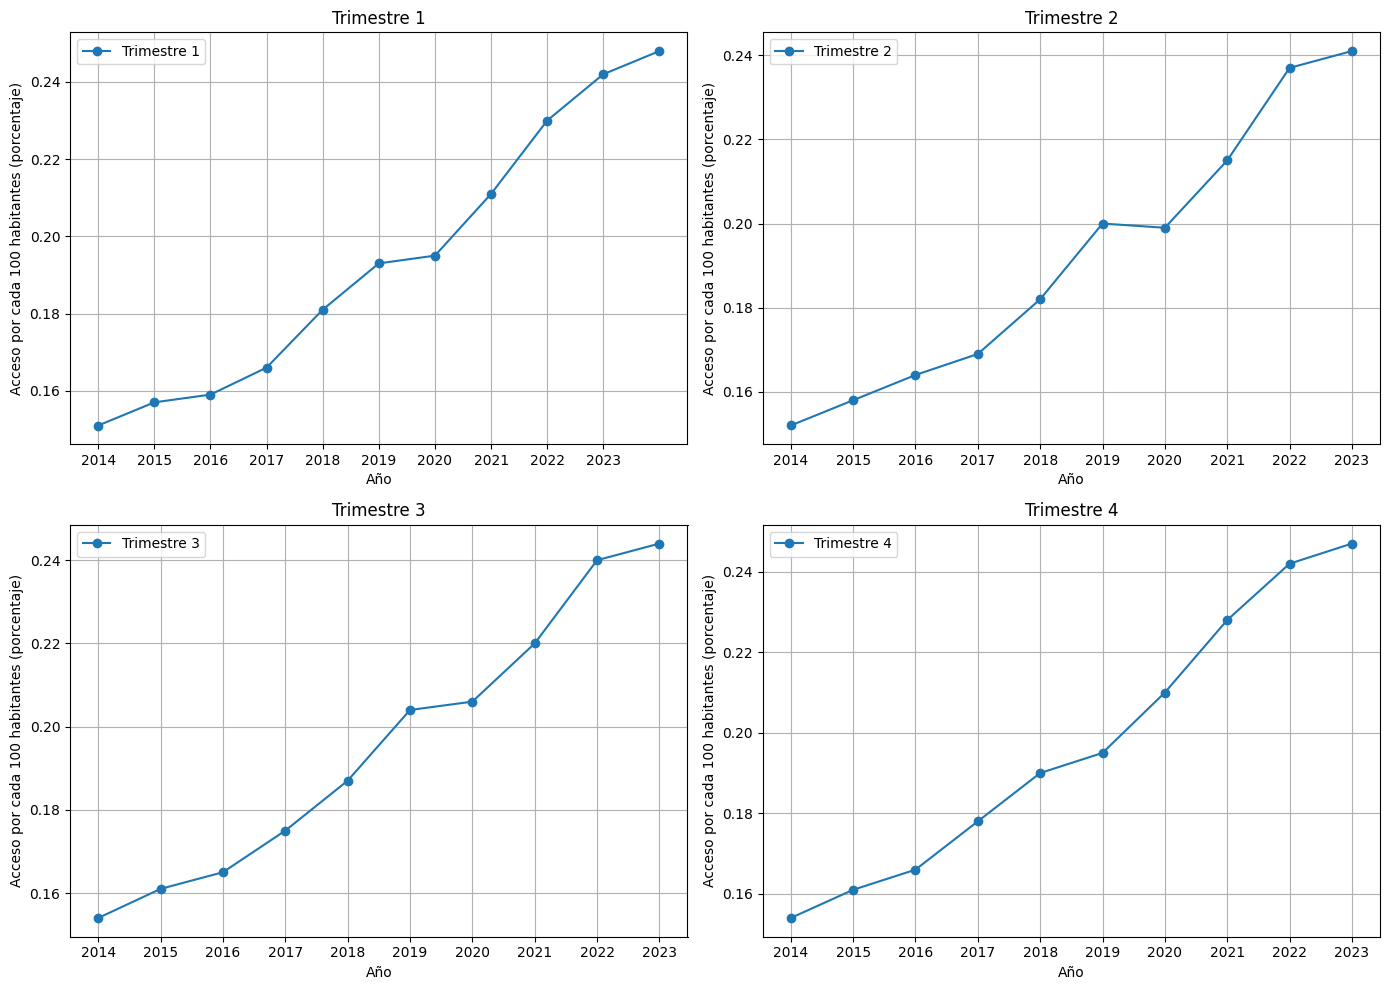

In [53]:
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Trimestre 1 vs Trimestre 2
axs[0, 0].plot(df_trim1['Año'], df_trim1['Accesos por cada 100 hab'], marker = 'o', label = 'Trimestre 1')
axs[0, 0].set_title('Trimestre 1')
axs[0, 0].set_xlabel('Año')
axs[0, 0].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[0, 0].set_xticks(range(2014, 2024))
axs[0, 0].legend()
axs[0, 0].grid(True)

# Trimestre 3 vs Trimestre 4
axs[0, 1].plot(df_trim2['Año'], df_trim2['Accesos por cada 100 hab'], marker = 'o', label = 'Trimestre 2')
axs[0, 1].set_title('Trimestre 2')
axs[0, 1].set_xlabel('Año')
axs[0, 1].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[0, 1].set_xticks(range(2014, 2024))
axs[0, 1].legend()
axs[0, 1].grid(True)

# Trimestre 1 vs Trimestre 3
axs[1, 0].plot(df_trim3['Año'], df_trim3['Accesos por cada 100 hab'], marker = 'o', label = 'Trimestre 3')
axs[1, 0].set_title('Trimestre 3')
axs[1, 0].set_xlabel('Año')
axs[1, 0].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[1, 0].set_xticks(range(2014, 2024))
axs[1, 0].legend()
axs[1, 0].grid(True)

# Trimestre 2 vs Trimestre 4
axs[1, 1].plot(df_trim4['Año'], df_trim4['Accesos por cada 100 hab'], marker = 'o', label = 'Trimestre 4')
axs[1, 1].set_title('Trimestre 4')
axs[1, 1].set_xlabel('Año')
axs[1, 1].set_ylabel('Acceso por cada 100 habitantes (porcentaje)')
axs[1, 1].set_xticks(range(2014, 2024))
axs[1, 1].legend()
axs[1, 1].grid(True)

# Ajustar el layout
plt.tight_layout()
plt.show()

# CALCULO DE KPI 

In [72]:
# Calcular el promedio de accesos por cada 100 hogares por provincia
kpi_hogar_prov = hogares_df.groupby('Provincia')['Accesos por cada 100 hogares'].mean().round(2)
print(kpi_hogar_prov)

# Calcular el promedio de accesos por cada 100 hogares a nivel nacional
kpi_hogar_nac = hogares_df['Accesos por cada 100 hogares'].mean().round(2)
print(f"Promedio nacional de accesos por cada 100 hogares: {kpi_hogar_nac}")

Provincia
Buenos Aires           65.97
Capital Federal        81.62
Catamarca              40.54
Chaco                  34.76
Chubut                 56.94
Corrientes             37.64
Córdoba                69.80
Entre Ríos             53.15
Formosa                28.09
Jujuy                  38.59
La Pampa               73.85
La Rioja               47.14
Mendoza                39.07
Misiones               37.95
Neuquén                64.45
Río Negro              55.51
Salta                  43.75
San Juan               35.60
San Luis               49.22
Santa Cruz             35.44
Santa Fe               64.84
Santiago Del Estero    34.52
Tierra Del Fuego       77.51
Tucumán                46.15
Name: Accesos por cada 100 hogares, dtype: float64
Promedio nacional de accesos por cada 100 hogares: 50.5


In [71]:
# Calcular el promedio de accesos por cada 100 habitantes por provincia
kpi_poblacion_prov = poblacion_df.groupby('Provincia')['Accesos por cada 100 hab'].mean().round(2)
print(kpi_poblacion_prov)

#Calcular el promedio de accesos por cada 100 habitantes a nivel nacional
kpi_poblacion_nac = poblacion_df['Accesos por cada 100 hab'].mean().round(2)
print(f"Promedio nacional de accesos por cada 100 habitantes: {kpi_poblacion_nac}")


Provincia
Buenos Aires           21.45
Capital Federal        46.15
Catamarca              10.31
Chaco                   9.29
Chubut                 17.45
Corrientes              9.91
Córdoba                21.36
Entre Ríos             15.89
Formosa                 7.15
Jujuy                   9.87
La Pampa               24.59
La Rioja               12.55
Mendoza                10.90
Misiones               10.33
Neuquén                19.18
Río Negro              17.07
Salta                  10.59
San Juan                9.07
San Luis               14.54
Santa Cruz             10.54
Santa Fe               20.38
Santiago Del Estero     8.56
Tierra Del Fuego       24.38
Tucumán                11.43
Name: Accesos por cada 100 hab, dtype: float64
Promedio nacional de accesos por cada 100 habitantes: 15.54


In [73]:
# Calcular la suma total de accesos por cada tecnología
accesos_por_tecnologia = Accesos_Por_Tecnologia.iloc[:, 3:].sum()

# Calcular la proporción de accesos por tecnología
proporcion_accesos_tecnologia = (accesos_por_tecnologia / accesos_por_tecnologia.sum()).round(4) * 100
print(proporcion_accesos_tecnologia)

ADSL            15.78
Cablemodem      25.14
Fibra óptica     6.49
Wireless         1.70
Otros            0.90
Total           50.00
ADSL_log         0.00
dtype: float64


In [57]:
# Asegurarte de que todos los DataFrames/Series tienen el mismo índice antes de concatenar
resultados = pd.DataFrame()

KPIS EN DATAFRAME

In [58]:
# Agregar promedio de accesos por cada 100 hogares por provincia
resultados['Provincia'] = kpi_hogar_prov.index
resultados['Promedio de Accesos por cada 100 hogares por Provincia'] = kpi_hogar_prov.values


In [59]:
# Agregar promedio nacional de accesos por cada 100 hogares
resultados['Promedio Nacional de Accesos por cada 100 hogares'] = kpi_hogar_nac


In [60]:
# Agregar promedio de accesos por cada 100 habitantes por provincia
resultados = resultados.merge(kpi_poblacion_prov, left_on='Provincia', right_index=True, how='left')
resultados.rename(columns={'Accesos por cada 100 hab': 'Promedio de Accesos por cada 100 habitantes por Provincia'}, inplace=True)


In [61]:
# Agregar promedio nacional de accesos por cada 100 habitantes
resultados['Promedio Nacional de Accesos por cada 100 habitantes'] = kpi_poblacion_nac


In [62]:
# Crear DataFrame separado para accesos por tecnología y proporciones
tecnologia_resultados = pd.DataFrame({
    'Tecnología': accesos_por_tecnologia.index,
    'Suma Total de Accesos por Tecnología': accesos_por_tecnologia.values,
    'Proporción de Accesos por Tecnología (%)': proporcion_accesos_tecnologia.values
})

In [63]:
# Guardar los resultados en archivos CSV separados
resultados.to_csv('resultados_kpis_provincia.csv', index=False)
tecnologia_resultados.to_csv('resultados_accesos_tecnologia.csv', index=False)
print("Archivos 'resultados_kpis_provincia.csv' y 'resultados_accesos_tecnologia.csv' creados exitosamente.")

Archivos 'resultados_kpis_provincia.csv' y 'resultados_accesos_tecnologia.csv' creados exitosamente.
